In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\Dowloads from AI\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop('PassengerId', axis= 1, inplace=True)

In [6]:
eliminate = ['Pclass','Name','Age','SibSp','Parch','Fare']
df.drop(eliminate,axis = 1 , inplace =True)
df.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [8]:
df.isnull().sum()

Survived      0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.groupby(df['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [14]:
df.groupby(df['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
df.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [16]:
df.groupby('Ticket').mean()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


In [17]:
df["Cabin Info"] = np.where(df['Cabin'].isnull(),"No Cabin Info", "Cabin info aval")

In [19]:
df.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin Info
0,0,male,A/5 21171,NaN,S,No Cabin Info
1,1,female,PC 17599,C85,C,Cabin info aval
2,1,female,STON/O2. 3101282,NaN,S,No Cabin Info
3,1,female,113803,C123,S,Cabin info aval
4,0,male,373450,NaN,S,No Cabin Info


<Figure size 432x288 with 0 Axes>

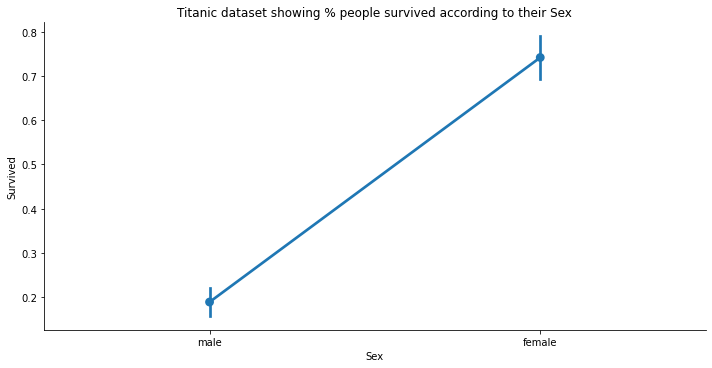

<Figure size 432x288 with 0 Axes>

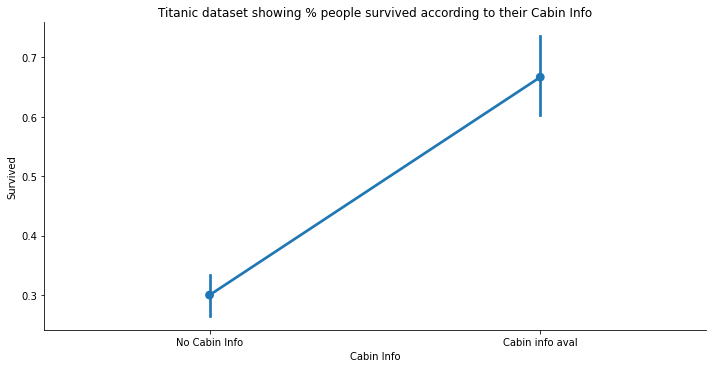

<Figure size 432x288 with 0 Axes>

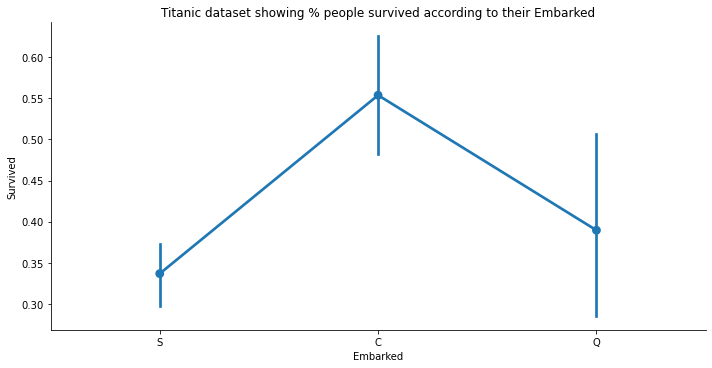

In [20]:
for i, col in enumerate(['Sex', "Cabin Info", 'Embarked']):
    plt.figure(i)
    sns.catplot(x = col , y = "Survived" , data = df, aspect = 2 , kind = 'point')
    plt.title('Titanic dataset showing % people survived according to their {}'.format(col))
    plt.show()

In [29]:
df.pivot_table('Survived',in
               , columns = 'Embarked' , aggfunc = 'count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [30]:
df.pivot_table('Survived', index= "Sex", columns = 'Cabin Info', aggfunc = 'count')

Cabin Info,Cabin info aval,No Cabin Info
Sex,,
female,97,217
male,107,470


In [32]:
df.pivot_table('Survived', index= "Cabin Info", columns = 'Embarked', aggfunc = 'count')

Embarked,C,Q,S
Cabin Info,,,
Cabin info aval,69,4,129
No Cabin Info,99,73,515


In [31]:
# Sex/ gender is deciding % survival for cabin info and also for embarked  category

In [34]:
df.drop(['Ticket','Cabin','Embarked'],axis =1 , inplace = True)
df.head()

,Survived,Sex,Cabin Info
0,0,male,No Cabin Info
1,1,female,Cabin info aval
2,1,female,No Cabin Info
3,1,female,Cabin info aval
4,0,male,No Cabin Info
